In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('clean-data/Whiskey_data/scottish_whisky_stats.csv')

In [3]:
df.head()

,name,age,vintage,vol,ml,price
0,"Glen Scotia, Acorn b.2010One of 165 Bottles",33.0,1977,54.6,700,265
1,"Glen Scotia, Adelphi b.2005(Cask 1071)",14.0,1991,61.6,700,87
2,"Glen Scotia, Braunstein (150th Anniversary ) b...",18.0,1992,60.2,700,102
3,"Glen Scotia, Cadenhead b.2008One of 310 Bottles",9.0,1999,59.5,700,56
4,"Glen Scotia, CadenheadAuthentic Collection b.2...",15.0,1991,57.8,700,137


In [5]:
X = df[['vintage', 'vol']]
y = df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .8)

<h1> Basic Linear Regression </h1>

In [10]:
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
print(f"training score: {model_lin.score(X_train, y_train)}")
print(f'{model_lin.score(X_test, y_test)}')

training score: 0.12051492486562243
0.12226340300981009


<h1>Neural Network Keras Regression</h1>

In [51]:
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from keras import losses
from keras import optimizers
import matplotlib.pyplot as plt

In [35]:
optimizers

<module 'keras.optimizers' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\keras\\optimizers.py'>

In [74]:
model = Sequential()
model.add(Dense(10, input_dim= 2, activation = 'relu'))
model.add(Dense(5, activation = 'linear'))
model.add(Dense(1, activation = 'linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [75]:
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])

In [76]:
history = model.fit(X_train, y_train, verbose=1, epochs=100)

Epoch 1/100
4763/4763 [==============================] - 1s 114us/step - loss: 775.1604 - mean_squared_error: 2482441.0064 - mean_absolute_error: 775.1604
Epoch 2/100
4763/4763 [==============================] - 0s 21us/step - loss: 349.9695 - mean_squared_error: 1746572.9092 - mean_absolute_error: 349.9695
Epoch 3/100
4763/4763 [==============================] - 0s 21us/step - loss: 349.8766 - mean_squared_error: 1747689.9090 - mean_absolute_error: 349.8766
Epoch 4/100
4763/4763 [==============================] - 0s 22us/step - loss: 350.1489 - mean_squared_error: 1745264.4148 - mean_absolute_error: 350.1489
Epoch 5/100
4763/4763 [==============================] - 0s 21us/step - loss: 350.1015 - mean_squared_error: 1746114.9958 - mean_absolute_error: 350.1015
Epoch 6/100
4763/4763 [==============================] - 0s 21us/step - loss: 350.4256 - mean_squared_error: 1746724.4035 - mean_absolute_error: 350.4256
Epoch 7/100
4763/4763 [==============================] - 0s 21us/step - los

4763/4763 [==============================] - 0s 20us/step - loss: 350.3800 - mean_squared_error: 1748565.7256 - mean_absolute_error: 350.3800
Epoch 54/100
4763/4763 [==============================] - 0s 19us/step - loss: 349.8942 - mean_squared_error: 1746810.1625 - mean_absolute_error: 349.8942
Epoch 55/100
4763/4763 [==============================] - 0s 19us/step - loss: 350.1638 - mean_squared_error: 1747127.3679 - mean_absolute_error: 350.1638
Epoch 56/100
4763/4763 [==============================] - 0s 21us/step - loss: 349.9793 - mean_squared_error: 1747047.2622 - mean_absolute_error: 349.9793
Epoch 57/100
4763/4763 [==============================] - 0s 22us/step - loss: 350.0729 - mean_squared_error: 1744548.9025 - mean_absolute_error: 350.0729
Epoch 58/100
4763/4763 [==============================] - 0s 18us/step - loss: 350.4442 - mean_squared_error: 1744337.9770 - mean_absolute_error: 350.4442
Epoch 59/100
4763/4763 [==============================] - 0s 19us/step - loss: 350.

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error'])


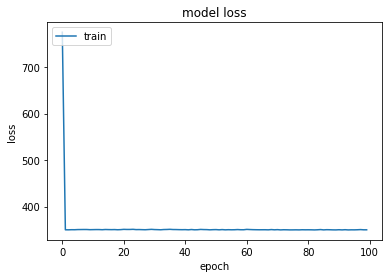

In [77]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

<h1> Guassian Mixture </h1>

In [78]:
from sklearn.mixture import GaussianMixture

In [112]:
model = GaussianMixture(10, 'diag')

In [81]:
df.columns

Index(['name', 'age', 'vintage', 'vol', 'ml', 'price'], dtype='object')

In [84]:
X = df[['age', 'vintage','vol','ml','price']].dropna(how = 'any')

In [113]:
model.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [114]:
model.score(X)

-11.704038497665941

In [115]:
model.predict(X)

array([7, 2, 2, ..., 6, 6, 2], dtype=int64)

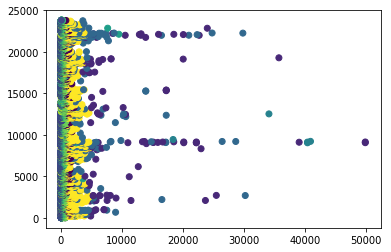

In [116]:
plt.scatter(X['price'], X.index, c=model.predict(X))